In [1]:
import pandas as pd # reading in pandas Library  
import numpy as np  # reading in numpy library 
import matplotlib.pyplot as plt  # reading in matplotlib library 
import seaborn as seabornInstance # reding in the seaborn library 
from sklearn.model_selection import train_test_split # reading in sklearn lirbary traiin and test functions
from sklearn.linear_model import LinearRegression # reading in sklearn lirbary linear regression function
from sklearn import metrics # reading in sklearn library as metrics
from sklearn.impute import SimpleImputer # reading in sklearn.impute simple inputer funtion
import plotly.graph_objs as go # reading in plotly.graph as go 
import plotly.offline as py # inport plotly.offline as pyeading
py.init_notebook_mode(connected=True) #  initiating the Plotly Notebook 
# the below line sets the backend of matplotlib to the 'inline' backend 
%matplotlib inline 

In [2]:
# Countires we are selecting
# This name has to match up what what's in teh Yields and teh Temp data 
# We dont know if this matches up yet. We might have to parse and clean if this 
# is the case

# creating a variable called countires that list the countires we want to pull from the datasets 
countires = [
    "Angola",
    "Benin",
    "Burkina Faso",
    "Burundi",
    "Cabo Verde",
    "Cameroon",
    "Central African Republic",
    "Chad",
    "Comoros",
    "Congo",
    "Côte d'Ivoire",
    "Democratic Republic of the Congo",
    "Equatorial Guinea",
    "Gabon",
    "Gambia",
    "Ghana",
    "Guinea",
    "Guinea-Bissau",
    "Kenya",
    "Liberia",
    "Madagascar",
    "Malawi",
    "Mali",
    "Mauritius",
    "Mozambique",
    "Niger",
    "Nigeria",
    "Rwanda",
    "Sao Tome and Principe",
    "Senegal",
    "Seychelles",
    "Sierra Leone",
    "Somalia",
    "Togo",
    "Uganda",
    "Zambia",
    "Zimbabwe"
]
# We had to exclude South Sudan and Sudan(former) from teh dataset because of the 
# lack of data present in the Cassava_10-14-2019 dataset. This may need to occur for 
# other datasets as well as we go forward.

In [3]:
Yields = pd.read_csv('/home/dgorrell/Downloads/Cassava_10-14-2019.csv') # reading in the dataset for Cassava 
Temp = pd.read_csv('/home/dgorrell/Downloads/GlobalTemperatures.csv') # readding in the dataset for gloabl tempatures
Preception = pd.read_csv('/home/dgorrell/Downloads/precipitation_perCountry_perYear.csv') # reading in the global dataset for precepitation

In [4]:
Preception["country"].unique()


array(['Canada', 'Saint Martin', 'Sao Tome and Principe', 'Turkmenistan',
       'Saint Helena', 'United States of America',
       'United Republic of Tanzania', 'Lithuania', 'Cambodia', 'Ethiopia',
       'US Naval Base Guantanamo Bay', 'Aruba', 'Swaziland', 'Palestine',
       'Argentina', 'Bolivia', 'Cameroon', 'Burkina Faso', 'Aland',
       'Ghana', 'Saudi Arabia', 'Rwanda',
       'South Georgia and South Sandwich Islands', 'Japan', 'Cape Verde',
       'United States Minor Outlying Islands', 'Northern Mariana Islands',
       'Slovenia', 'Guatemala', 'Bosnia and Herzegovina', 'Guinea',
       'Jordan', 'Saint Barthelemy', 'Ashmore and Cartier Islands',
       'Baykonur Cosmodrome', 'Dominica', 'Liberia', 'Maldives',
       'Pakistan', 'Oman', 'Zambia', 'Mauritania', 'Greenland', 'Gabon',
       'Niue', 'Monaco', 'Wallis and Futuna', 'New Zealand', 'Yemen',
       'Jersey', 'Jamaica', 'Albania', 'Samoa', 'Norfolk Island',
       'United Arab Emirates', 'Guam', 'Uruguay', 'India'

In [5]:
years = np.unique(Temp['dt'].apply(lambda x: x[:4])) # prints the list of years within the tempeture datset in 
# print(years)
mean_temp_world = [] # creating a varible with the name mean_tem_world that contains an empty list
mean_temp_world_uncertainty = [] # creating a variable named mean_temp_world_uncertainty that contains an empty list

for year in years: # Creating a for loop to grab year in our variable years
    mean_temp_world.append(Temp[Temp['dt'].apply( # appending the empty list variable mean_temp_world with the column date "dt" in Tem
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean()) # and then taking the mean of Lan  
    mean_temp_world_uncertainty.append(Temp[Temp['dt'].apply( # appending the empty list mean_temp_world_uncertaitnty to the columndt on Temp
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean()) # taking the 

In [6]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of 
#colonies at this the countries) and countries for which no information about the temperature
global_temp_country = pd.read_csv('/home/dgorrell/Downloads/GlobalLandTemperaturesByCountry.csv') # read ing global land temp data
global_temp_country["Country"].unique() # finding the unique values in the Column Country
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])] # this variable selects particular countires within our gloabl temp country variable
#global_temp_country_clear["Country"].unique()
global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)', 'Cape Verde'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom', 'Cabo Verde']) # This variable replaces the countires in global tem country cleared with selected names
#global_temp_country_clear["Country"].unique()

In [7]:
mean_temp_year_country = [ [0] * len(years[0:]) for i in range(len(countires))] # creating a variable called mean temp year country where you're multiplying 0 by the length of years in the range of countires 
#print(mean_temp_year_country)
j = 0 # creating a variable named j and making it equal to zero
for country in countires: 
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country] # creating function where it finds the country global temp data and matchesit to our countries variable
    i = 0 # creating variable called i making that equal to 0 
    #print(country)
    for year in years[0:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean() # this function finds the years asscoited all temp countues while also avergaging the mean of average temp.
        # print(year)
        i +=1 # creating and counts years of the countries that are presnet within the data by year
        #print(i)
    j += 1 # counts and creats list of countires we are finding 
    #print(j)
    
#mean_temp_year_country

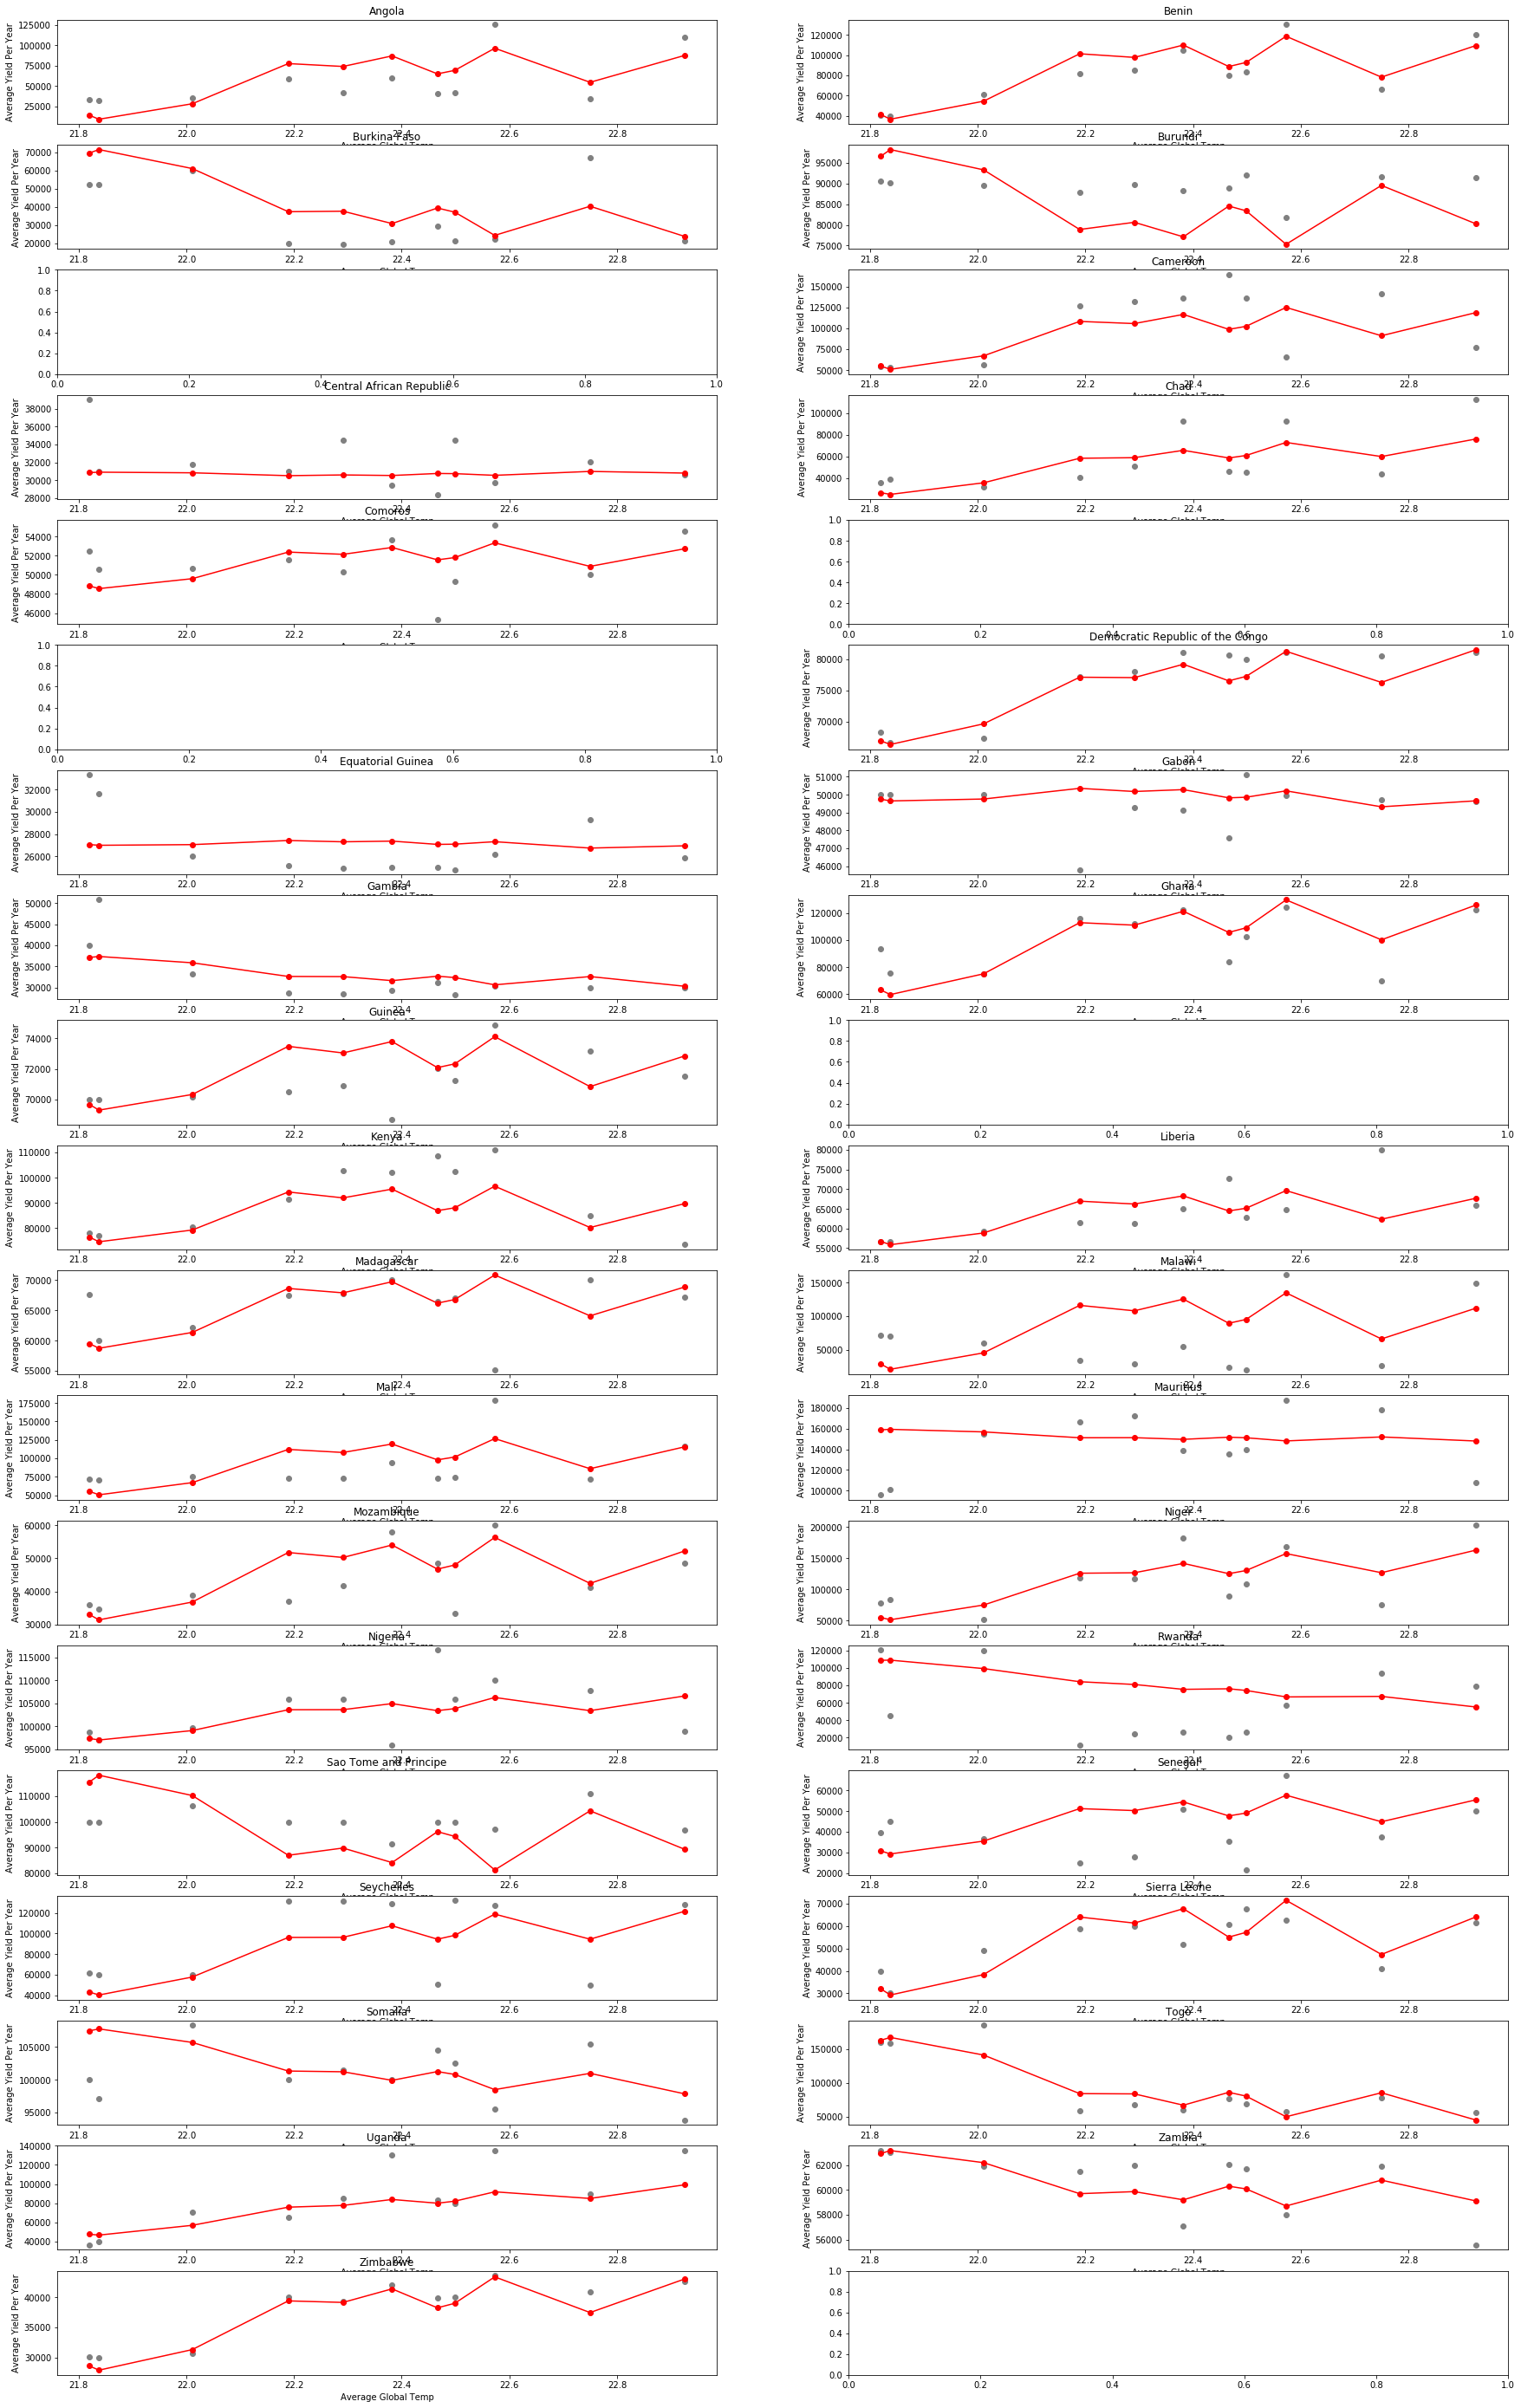

In [9]:
fig, axmatrix = plt.subplots(19,2, figsize = (30, 50))# creating demnsitons of our plots
ax = axmatrix.flatten() # creates subplots
for iplot, COUNTRY in enumerate (countires):
    # Creating masks for yields country
    maskCountry = Yields["Area"] == COUNTRY # creating varible called maskCountry where we make the area of Yileds = to country
    yearsInCountry = Yields["Year"][maskCountry] # creating list of years presenet in the data for each country sepecified in maskCountry
    yieldsInCountry = Yields["Value"][maskCountry] # creating list of values presenet in the Yields data for each country sepecified in maskCountry
    
    # Creating masks for precepitation
    maskPreception = Preception["country"] == COUNTRY # making country in Preception equal to countries variable 
    yearsInPreception = np.array(Preception["year"][maskPreception]).astype("int") # reading the column year as fucntion of maskPreception in an np array as data type int
    preceptionInCountry = Preception["total_rainfall"][ maskPreception] # creating a mask for preception data values of total rain fall as a function of the  maskPreception
    
    # the line below creates an if statement that prints outs Preception data if length is greater than 0
    if len(preceptionInCountry) >0:
    
    # Creating masks for temp
        maskedTempCountry = countires == COUNTRY # making countries in temp data equal to COUNTY
        tempInCountry = np.array(mean_temp_year_country[maskedTempCountry]) # making mean-temp-year-country a fucntion of masked temp country
        yearsInCountryTemp = np.array(years).astype("int") # creating list of years for each country

        # Making sure that things are over the same year range
        minAll = max([yearsInCountryTemp.min(),yearsInCountry.min(), yearsInPreception.min()]) # gathing the max of all mins 
        maxAll = min([yearsInCountryTemp.max(),yearsInCountry.max(), yearsInPreception.max()]) # gathering the min of all max
        
        # For Yields 
        yearsYieldsInCountryMasked = yearsInCountry[(yearsInCountry >= minAll) & (yearsInCountry <= maxAll)] # defing the perameters for years in country based on minall and maxall variables
        yieldsInCountryMasked = yieldsInCountry[(yearsInCountry >= minAll) & (yearsInCountry <= maxAll)] # defing the perameters for temp in country based on minall and maxall variables
        
        # for Preceptation
        yearsPrecepInCountryMasked = yearsInPreception[(yearsInPreception >= minAll) & (yearsInPreception <= maxAll)] # defining the perametrs for precep in for year in country based on max and min all
        precepInCountryMasked = preceptionInCountry[(yearsInPreception >= minAll) & (yearsInPreception <= maxAll)] # defining the perametrs for precep in for year in country based on max and min all
        
        # For Temp
        yearsInCountryMasked = yearsInCountryTemp[(yearsInCountryTemp >= minAll) & (yearsInCountryTemp <= maxAll)] # defining the perametrs for temp in for year in country based on max all
        tempInCountryMasked = tempInCountry[(yearsInCountryTemp >= minAll) & (yearsInCountryTemp <= maxAll)]  # defining the perametrs for tenp in for year in country based on max all

        # Masking All to same year subset
        
        # Masking Temp
        maskTemp = np.in1d(yearsInCountryMasked, yearsYieldsInCountryMasked) # creates true fales list to determine if any  years are out of the peramters
        tempInCountryMasked = tempInCountryMasked[maskTemp] # creates a value list of the variables in mask temp
        
        # Masking Yields
        maskYield = np.in1d(yearsYieldsInCountryMasked, yearsInCountryMasked) # creates true fales list to determine if any yield are out of the peramters
        yieldsInCountryMasked = yieldsInCountryMasked[maskYield] # creating a list of yields as a function of maskYield
        finalYearsMaksedInYields = yearsYieldsInCountryMasked[maskYield] # finalizing years masked in yield
        
        # Maksing Precep 
        maskPrecep = np.in1d(yearsPrecepInCountryMasked, finalYearsMaksedInYields) # creates  true false list to determine if recep is out of peramters
        precepInCountryMasked = yearsPrecepInCountryMasked[maskPrecep] # creates  true false list to determine if recep is out of peramters

        # Now Linear Regression
        # This is creating our repsonse variable 
        y = yieldsInCountryMasked.values # changing shape of dataframe temp in country masked
        # We are masking out NaNs in the Temp data
        mask = ~np.isnan(tempInCountryMasked) # creating a variable called mask that checks if nan is prenset 
        tempInCountryMasked = tempInCountryMasked[mask] # creating a variable called mask that checks if nan is prenset 
        y = y[mask]  # check if nan is presne in y
        precepInCountryMasked = precepInCountryMasked[mask] # checks if any nans are presnet
        
        # We are masking out NaNs in the Yields data, which we have defined by the variable y
        mask = ~np.isnan(y) # check if nans present
        #print(len(tempInCountryMasked), len(mask))
        tempInCountryMasked = tempInCountryMasked[mask] # checking nans
        y = y[mask] # checking nans
        precepInCountryMasked = precepInCountryMasked[mask] # checking nans 
        
        # We are masking out NaNs in the Precep data
        mask = ~np.isnan(precepInCountryMasked) # creating a variable called mask that checks if nan is prenset 
        tempInCountryMasked = tempInCountryMasked[mask] # # creating a variable called temp in countyr masked that checks if nan is prenset 
        y = y[mask] # check if nan is presne in y
        precepInCountryMasked = precepInCountryMasked[mask] # checking for nans

        # Reformat input so that they fit the linear regression
        y = y.reshape(-1,1) # reshaping that variable y 
        
        # combine precp and temp data into our x variable for input
        X = np.zeros([len(precepInCountryMasked), 2]) # cmbining data around 0  
        X[:,0] = tempInCountryMasked # placing the varible in temp in country masked
        X[:,1] = precepInCountryMasked # placing the varibale in preceo in countyr masked
        
        length_of_real_values = len(X[~np.isnan(X)]) # creates a varible called length_of_real_values that idnetifies that actual length of X
        
        # Doing Linear Regression
        # the line below creates a if statement that finds the value of length_of_real_values thats greateer than 0 
        if length_of_real_values >0:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # Creating the train and test models
            # Indext's possible that there are Nan, + or - infintaties that may cause us errors 
            #mask = np.isnan(X_train)
            #X_train = X_train[~mask].reshape(-1,1)
            #y_train = y_train[~mask].reshape(-1,1)
            regressor = LinearRegression() # creating a variable called regressor that equalts teh linearregression function
            regressor.fit(X_train, y_train) #training the algorithm
            y_pred = regressor.predict(X_test) # creates prediction points
            df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
            xplt = X_test[:,0] # creating xplt 
            yplt = y_test # creating yplt 
            index = np.argsort(xplt) # indexing xplt by aggrogatting
            yplt = yplt[index] # indexing 
            xplt = xplt[index] # indexing 
            yPredicPlt = y_pred[index] #indexingy predcit olot
            ax[iplot].scatter(xplt, yplt,  color='gray') # plotting deatial of plt
            ax[iplot].plot(xplt, yPredicPlt, "ro") # plotting deatial of plt
            ax[iplot].plot(xplt, yPredicPlt, "r") # plotting deatial of plt
            ax[iplot].set_xlabel("Average Global Temp") # plotting deatial of plt
            ax[iplot].set_ylabel("Average Yield Per Year") # plotting deatial of plt
            ax[iplot].set_title(COUNTRY) # plotting deatial of plt
plt.show()# plotting

In [ ]:
# If we are doing rows and columns its a two element matrix of axes
# Check out the four different crops in the article and upload them 
# Take screenshots of each of the 4 results
# If we understand the affects of temp we have to understand confoudning factors such as rain fall, perceitation
# We might have to get new temp data that incorporates more things like percipitation and rainfall 
# Write down things that worked for independent Study what didn't work!
# Github, Box, Google Drive are all good places to backup and store info! 
# Drop box for things you wriite
# GitHub for all code

In [ ]:
# !pip install netCDF4

In [ ]:
# !pip install git+https://github.com/che0/countries

In [ ]:
# Lattitude, Longitued and countreis
# Preceptiation per month as a measure of longitutde and latutude
# Look up the terrain of the African Continent

In [ ]:
# HW: Do this with just the Temp, so look at the plot diffrences with multi linear regression vs single linear regression
# Make comments on ALL LINES! Jill will yell at you, so DO IT THIS WEEK!!!
# Also think about making new plots for Precp, look at current plt

In [ ]:
# how do we put this stuff on the web
# watch the github viedeo on how to make a github 
# Change idyll page to make it relevent to independent study
# Check out the sample gallery here = https://idyll-lang.org/
# send Jill an email to remind her to send you a guest link of lectures 
# ask Elizebth how to save things to GitHub 

# HOW TO ACCESS IDYLL
# Go to Terminal 
# cd to my-idyll-post
    # in direct print idyll 
    # to edit content of web page you edit the index.idyll file
        # using juypter